#Association rules

# Install library

In [2]:
pip install mlxtend

In [3]:
pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 14.3 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


# Read the dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#dataset source
#https://www.kaggle.com/heeraldedhia/groceries-dataset
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/Groceries_dataset.csv', delimiter=',')
df


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


mengurutkan dataset berdasarkan tanggal dan customer ID

In [5]:
df.sort_values(['Date','Member_number'], ascending=[True, True])

,Member_number,Date,itemDescription
10065,1249,01-01-2014,citrus fruit
26214,1249,01-01-2014,coffee
15338,1381,01-01-2014,curd
31487,1381,01-01-2014,soda
11134,1440,01-01-2014,other vegetables
...,...,...,...
24368,4773,31-10-2015,other vegetables
4415,4882,31-10-2015,tropical fruit
20564,4882,31-10-2015,pickled vegetables
1496,4934,31-10-2015,canned beer


Checking for the missing values

In [6]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

check tipe dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


# Visualization

buat kolom tambahan seperti year, month, day

In [8]:
df.Date = pd.to_datetime(df.Date)
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df.head()

,Member_number,Date,itemDescription,year,month,day
0,1808,2015-07-21,tropical fruit,2015,7,21
1,2552,2015-05-01,whole milk,2015,5,1
2,2300,2015-09-19,pip fruit,2015,9,19
3,1187,2015-12-12,other vegetables,2015,12,12
4,3037,2015-01-02,whole milk,2015,1,2


check tipe data dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
 3   year             38765 non-null  int64         
 4   month            38765 non-null  int64         
 5   day              38765 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.8+ MB


check 10 product yang paling laris

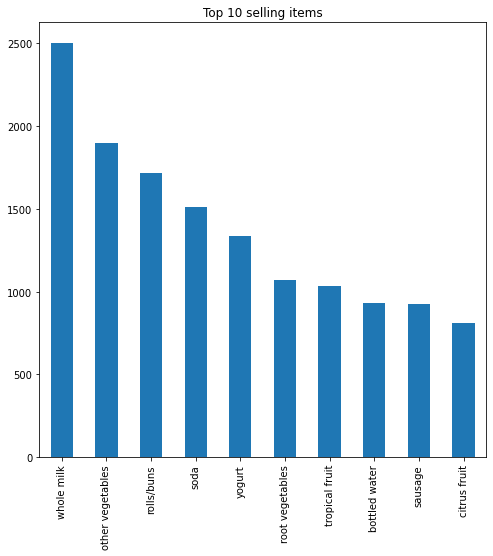

In [10]:
plt.figure(figsize = (8,8))
df.itemDescription.value_counts().head(10).plot.bar()
plt.title('Top 10 selling items')
plt.show()

10 product yang paling tidak laku

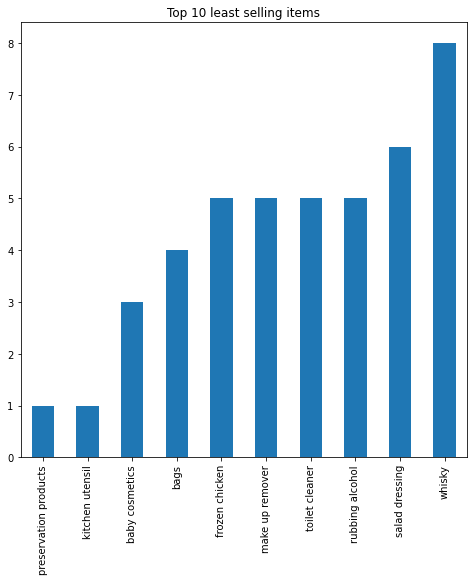

In [11]:
plt.figure(figsize = (8,8))
df.itemDescription.value_counts().tail(10).sort_values().plot.bar()
plt.title('Top 10 least selling items')
plt.show()

check 10 customer yang membeli product terbanyak

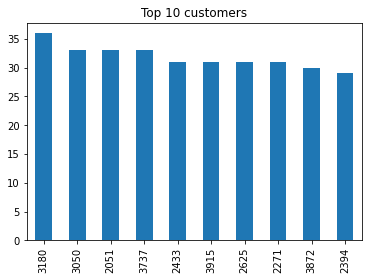

In [12]:
df.Member_number.value_counts().head(10).plot.bar()
plt.title('Top 10 customers')
plt.show()

check jumlah product yang dibeli berdasarkan bulan (tidak memperdulikan tahun)

In [13]:
month = df.groupby(df['Date'].dt.strftime('%m'))['itemDescription'].count()
month

Date
01    3333
02    3032
03    3283
04    3172
05    3335
06    3316
07    3268
08    3498
09    2963
10    3218
11    3273
12    3074
Name: itemDescription, dtype: int64

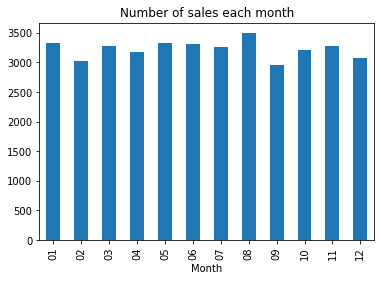

In [14]:
month.plot(x='Date', kind='bar')
plt.xlabel('Month')
plt.title('Number of sales each month')
plt.show()

check jumlah product yang dibeli berdasarkan bulan dan tahun

In [15]:
month2 = df.groupby(['year','month']).agg({'itemDescription':'count'}).reset_index()
month2 = month2.rename(columns={'itemDescription': 'number_of_products'})
month2

,year,month,number_of_products
0,2014,1,1504
1,2014,2,1547
2,2014,3,1491
3,2014,4,1506
4,2014,5,1625
5,2014,6,1525
6,2014,7,1623
7,2014,8,1535
8,2014,9,1350
9,2014,10,1555


jumlah unique customer berdasarkan tahun dan bulan

In [16]:
df_cust = df.groupby(['year','month']).agg({'Member_number':'nunique'}).reset_index()
df_cust = df_cust.rename(columns={'Member_number': 'number_of_customer'})
df_cust

,year,month,number_of_customer
0,2014,1,605
1,2014,2,620
2,2014,3,608
3,2014,4,608
4,2014,5,650
5,2014,6,598
6,2014,7,636
7,2014,8,621
8,2014,9,556
9,2014,10,649


jumlah product yang dibeli oleh customer, berdasarkan bulan dan tahun

In [17]:
df_freq = df.groupby(['year','month','Member_number',]).agg({'itemDescription':'count'}).reset_index()
df_freq = df_freq.rename(columns={'itemDescription': 'number_of_products'})
df_freq

,year,month,Member_number,number_of_products
0,2014,1,1003,2
1,2014,1,1004,4
2,2014,1,1005,2
3,2014,1,1009,2
4,2014,1,1013,3
...,...,...,...,...
13872,2015,12,4985,2
13873,2015,12,4988,2
13874,2015,12,4990,2
13875,2015,12,4997,4


# Dataset preparation

In [27]:
df

,Member_number,Date,itemDescription,year,month,day
0,1808,2015-07-21,tropical fruit,2015,7,21
1,2552,2015-05-01,whole milk,2015,5,1
2,2300,2015-09-19,pip fruit,2015,9,19
3,1187,2015-12-12,other vegetables,2015,12,12
4,3037,2015-01-02,whole milk,2015,1,2
...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10
38761,2022,2014-02-23,candy,2014,2,23
38762,1097,2014-04-16,cake bar,2014,4,16
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12


buat market basket transactions

In [28]:
df_group = df.groupby(['Member_number','Date'])['itemDescription'].agg(lambda x: ','.join(x.dropna())).reset_index()
df_group.sort_values(by='Date', ascending=True, inplace=True,ignore_index=True)
df_group

,Member_number,Date,itemDescription
0,3956,2014-01-01,"yogurt,shopping bags,waffles,chocolate"
1,1922,2014-01-01,"tropical fruit,other vegetables"
2,1789,2014-01-01,"hamburger meat,candles"
3,4260,2014-01-01,"soda,brown bread"
4,4942,2014-01-01,"butter,frozen vegetables"
...,...,...,...
14958,3738,2015-12-30,"onions,flour"
14959,2970,2015-12-30,"turkey,meat,rolls/buns"
14960,3971,2015-12-30,"brown bread,bottled beer"
14961,1527,2015-12-30,"domestic eggs,whole milk,bottled water"


In [29]:
dataset = []
for i in range(len(df_group['itemDescription'])):
  new_val = df_group['itemDescription'].iloc[i].split(',')
  dataset.append(new_val)

dataset

[['yogurt', 'shopping bags', 'waffles', 'chocolate'],
 ['tropical fruit', 'other vegetables'],
 ['hamburger meat', 'candles'],
 ['soda', 'brown bread'],
 ['butter', 'frozen vegetables'],
 ['citrus fruit', 'coffee'],
 ['curd', 'soda'],
 ['other vegetables', 'yogurt', 'Instant food products'],
 ['onions', 'whipped/sour cream', 'dishes'],
 ['sliced cheese', 'bottled water'],
 ['other vegetables', 'yogurt'],
 ['berries', 'whipped/sour cream', 'bottled water'],
 ['hamburger meat', 'frozen potato products'],
 ['waffles', 'whole milk'],
 ['hamburger meat', 'bottled beer', 'domestic eggs'],
 ['cleaner', 'shopping bags'],
 ['whole milk', 'flower (seeds)'],
 ['yogurt', 'frozen vegetables'],
 ['sausage', 'bottled water'],
 ['bottled water', 'Instant food products'],
 ['specialty chocolate', 'frozen vegetables'],
 ['soda', 'shopping bags'],
 ['frozen vegetables', 'specialty bar'],
 ['citrus fruit', 'pickled vegetables'],
 ['sugar', 'cream cheese '],
 ['butter', 'candy'],
 ['frozen dessert', 'misc.

In [30]:
len(df_group['itemDescription'])

14963

In [31]:
df_group['itemDescription'].iloc[0].split(',')

['yogurt', 'shopping bags', 'waffles', 'chocolate']

# Frequent itemsets generation
- http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

In [39]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

'''
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]
'''
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_new = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_new, min_support=0.005, use_colnames=True)

### alternatively:
#frequent_itemsets = fpgrowth(df_new, min_support=0.005, use_colnames=True)
#frequent_itemsets = fpmax(df, min_support=0.005, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.021386,(UHT-milk)
1,0.008087,(baking powder)
2,0.033950,(beef)
3,0.021787,(berries)
4,0.016574,(beverages)
...,...,...
121,0.011629,"(soda, whole milk)"
122,0.005814,"(soda, yogurt)"
123,0.008220,"(tropical fruit, whole milk)"
124,0.005213,"(tropical fruit, yogurt)"


In [33]:
df_new

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,

# Rule generation

In [35]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
1,(bottled water),(other vegetables),0.060683,0.122101,0.005480,0.090308,0.739619,-0.001929,0.965051
2,(bottled water),(whole milk),0.060683,0.157923,0.007151,0.117841,0.746196,-0.002432,0.954564
3,(canned beer),(whole milk),0.046916,0.157923,0.006015,0.128205,0.811821,-0.001394,0.965912
4,(citrus fruit),(whole milk),0.053131,0.157923,0.007151,0.134591,0.852259,-0.001240,0.973040
5,(domestic eggs),(whole milk),0.037091,0.157923,0.005280,0.142342,0.901341,-0.000578,0.981834
6,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420
7,(frankfurter),(whole milk),0.037760,0.157923,0.005280,0.139823,0.885388,-0.000683,0.978958
8,(newspapers),(whole milk),0.038896,0.157923,0.005614,0.144330,0.913926,-0.000529,0.984114
9,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249


In [36]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968
2,(domestic eggs),(whole milk),0.037091,0.157923,0.005280,0.142342,0.901341,-0.000578,0.981834
3,(whole milk),(domestic eggs),0.157923,0.037091,0.005280,0.033432,0.901341,-0.000578,0.996214
4,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420
5,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579
6,(newspapers),(whole milk),0.038896,0.157923,0.005614,0.144330,0.913926,-0.000529,0.984114
7,(whole milk),(newspapers),0.157923,0.038896,0.005614,0.035548,0.913926,-0.000529,0.996529
8,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963
9,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613
